# IMPORT PYTHON MODULES

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

# IMPORT AND VALIDATE DATA 

In [2]:
warnings.filterwarnings("ignore")

#import data
data = r"C:\Users\katdovzh\Desktop\projects\campaigns_analysis\dataset\marketing_data.csv"
df = pd.read_csv(data)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/2014,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,8/31/2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,NaN
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [ ]:
# Remove users without medium path info
data_filtered = cp[cp['medium_path'].notnull()]
data_filtered['first_touchpoint'] = pd.to_datetime(data_filtered['first_touchpoint'])
data_filtered['conversion_timestamp'] = pd.to_datetime(data_filtered['conversion_timestamp'])

NameError: name 'cp' is not defined

# PREPROCESS DATA

## Handling Missing Values

In [6]:
# Check for null values
null_values = df.isnull().sum()
print(null_values)


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


In [9]:
# Fill missing income with the median value
df['Income'] = df['Income'].fillna(df['Income'].median())


In [10]:
# Check for null values
null_values = df.isnull().sum()
print(null_values)



ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64


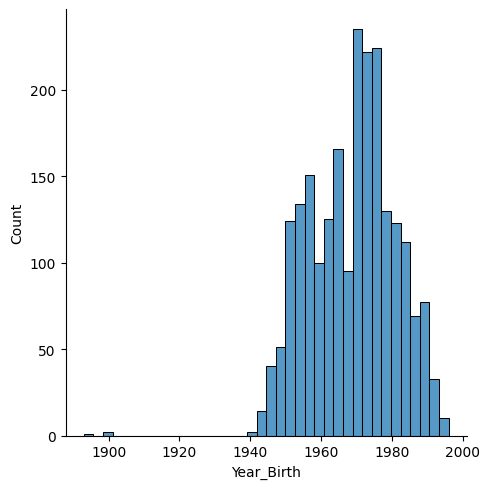

In [11]:
# Year of birth distribution
ax = sns.displot(data = df, x="Year_Birth")


<Axes: xlabel='Year_Birth'>

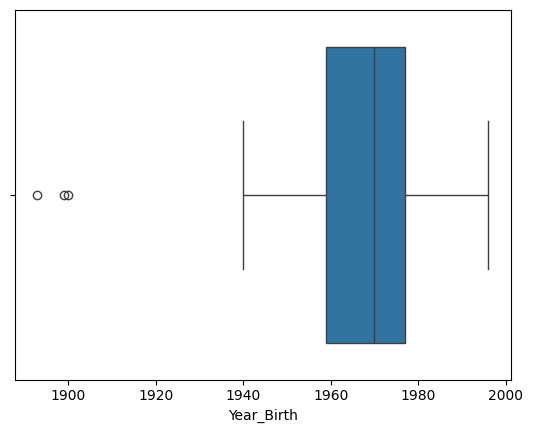

In [12]:
sns.boxplot(data = df, x="Year_Birth")

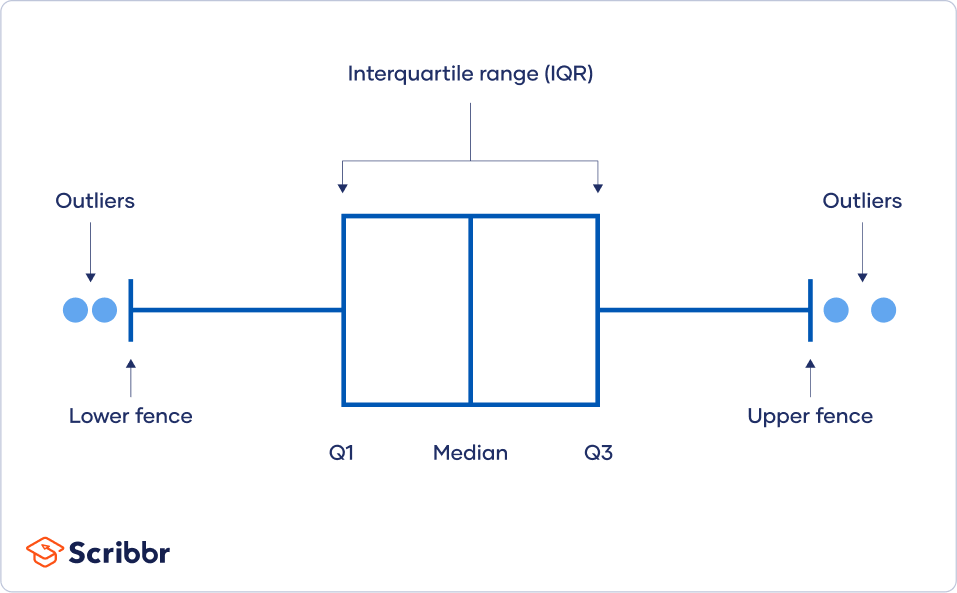

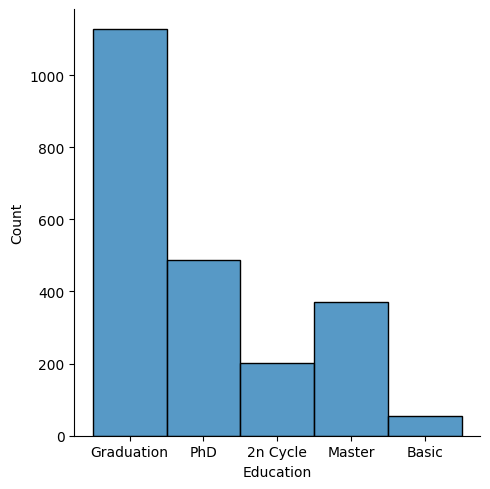

In [8]:
ax = sns.displot(data = df, x="Education")

In [10]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

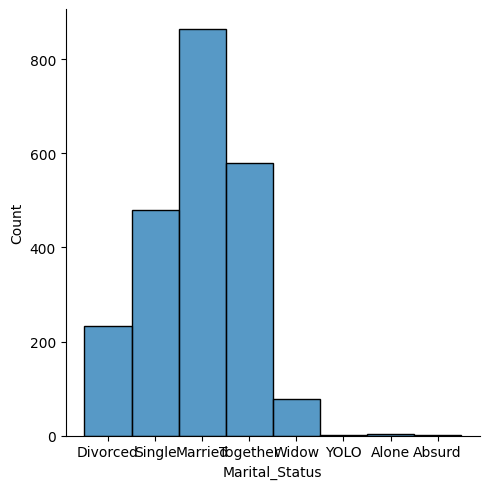

In [11]:
ax = sns.displot(data = df, x="Marital_Status")

In [14]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [18]:
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')

In [19]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      483
Divorced    232
Widow        77
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

# CLEANING DATA

### Remove outliers using the Interquartile Range (IQR) method

In [17]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['Year_Birth'] >= lower_bound) & (df['Year_Birth'] <= upper_bound)]

print(f"Number of rows before removing outliers: {df.shape[0]}")
print(f"Number of rows after removing outliers: {df_filtered.shape[0]}")


1959.0
1977.0
18.0
1932.0
2004.0
Number of rows before removing outliers: 2240
Number of rows after removing outliers: 2237


In [ ]:
final_df.head(15)

# STORE FINAL DATASET

In [ ]:
final_df.to_csv('final_dataset.csv')